# Analysis of the cornavirus data with Python

In [1]:
import bs4 
import requests 
from bs4 import BeautifulSoup
import io
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We need to first get the URL of the official website of the city of Cologne. With help of a the function retrieveData the data is parsed into a list with values starting from the 01.01.2021 until the present day:

In [2]:
url = "https://www.stadt-koeln.de/artikel/69443/index.html"

In [3]:
def retrieveData(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")
    data = []
    table = soup.find_all('div', {'class':'tinyblock', 'id':'ziel_0_48'})
    table_body = table[0].find_all('tbody')
    rows = table_body[0].find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        columns = [ele.text.strip() for ele in cols]
        data.append([ele for ele in columns]) # Get rid of empty values #if ele
    data.reverse()
    return data

In [ ]:
#Alternative method
"""
r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df = df_list[0]
df.head()
"""

Convert the data to dataframe with Pandas and place the very first row as the header any missing values are filled with the mean but some probably need to be removed afterwards depending on the trent:

In [20]:
data = retrieveData(url)
df = pd.DataFrame(data)

In [21]:
header = df.iloc[0] 
df = df[1:] 
df.columns = header
df = df.fillna(df.mean())
df.tail(20)

,Stand,Inzidenzwert,Bestätigte Kölner Fälle,Aktuell Infizierte in Köln*,Personen in stationärer Behandlung*,Kölner Todesfälle
140,20.05.2021,"94,2",51.938,1.980,255,686
141,21.05.2021,"94,6",52.067,1.880,245,688
142,22.05.2021,"102,8",52.224,1.818,229,688
143,23.05.2021,"92,1",52.318,1.711,235,689
144,24.05.2021,"69,3",52.373,1.602,231,689
145,25.05.2021,"69,7",52.434,1.530,225,691
146,26.05.2021,"56,3",52.463,1.388,181,695
147,27.05.2021,"52,4",52.532,1.277,172,699
148,28.05.2021,"51,8",52.634,1.240,162,700
149,29.05.2021,"42,7",52.681,1.282,154,702


In [22]:
#Parse the dates:
df.Stand = pd.to_datetime(df.Stand, dayfirst=True)
df.tail(20)

,Stand,Inzidenzwert,Bestätigte Kölner Fälle,Aktuell Infizierte in Köln*,Personen in stationärer Behandlung*,Kölner Todesfälle
140,2021-05-20,"94,2",51.938,1.980,255,686
141,2021-05-21,"94,6",52.067,1.880,245,688
142,2021-05-22,"102,8",52.224,1.818,229,688
143,2021-05-23,"92,1",52.318,1.711,235,689
144,2021-05-24,"69,3",52.373,1.602,231,689
145,2021-05-25,"69,7",52.434,1.530,225,691
146,2021-05-26,"56,3",52.463,1.388,181,695
147,2021-05-27,"52,4",52.532,1.277,172,699
148,2021-05-28,"51,8",52.634,1.240,162,700
149,2021-05-29,"42,7",52.681,1.282,154,702


Apparently the data in the website is of string type so we need to do a little processing before we transform the column values to the proper data type

In [23]:
df['Aktuell Infizierte in Köln*'] = df['Aktuell Infizierte in Köln*'].str.replace('.','')
df['Bestätigte Kölner Fälle'] = df['Bestätigte Kölner Fälle'].str.replace('.','')
df['Inzidenzwert'] = df['Inzidenzwert'].str.replace(',','.')

In [24]:
df.iloc[:,1:] = df.iloc[:, 1:].apply(pd.to_numeric)

In [25]:
df.dtypes

0
Stand                                  datetime64[ns]
Inzidenzwert                                  float64
Bestätigte Kölner Fälle                       float64
Aktuell Infizierte in Köln*                   float64
Personen in stationärer Behandlung*             int64
Kölner Todesfälle                               int64
dtype: object

Get the general stats:

In [26]:
df.describe()

,Inzidenzwert,Bestätigte Kölner Fälle,Aktuell Infizierte in Köln*,Personen in stationärer Behandlung*,Kölner Todesfälle
count,158.000000,157.000000,158.000000,159.000000,159.000000
mean,107.375316,39003.433121,1945.715190,244.283019,550.773585
std,48.835255,8758.661134,1008.258473,76.207921,105.601887
min,23.700000,26017.000000,522.000000,101.000000,343.000000
25%,72.150000,31790.000000,1181.500000,176.000000,468.000000
50%,96.400000,36781.000000,1552.000000,236.000000,561.000000
75%,131.850000,47782.000000,2530.500000,296.500000,636.000000
max,250.100000,53065.000000,4362.000000,398.000000,712.000000


It will be useful to start another dataframe that has the dates as the index and gets rid of the missing values:

In [27]:
dff = df.set_index(['Stand'])
dff = dff.dropna()
dff.tail()
#dff.fillna(dff.mean(),inplace=True)

,Inzidenzwert,Bestätigte Kölner Fälle,Aktuell Infizierte in Köln*,Personen in stationärer Behandlung*,Kölner Todesfälle
Stand,,,,,
2021-06-04,32.8,52961.0,718.0,112,709
2021-06-05,31.1,52996.0,650.0,117,709
2021-06-06,27.6,53031.0,598.0,110,710
2021-06-07,26.7,53051.0,561.0,107,711
2021-06-08,23.7,53065.0,522.0,101,712


Let's plot the cumulative confirmed cases and the number of infected individuals:

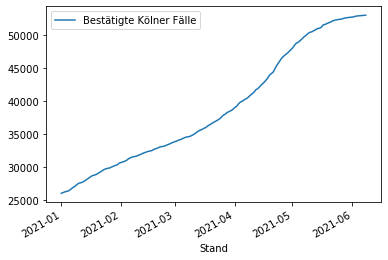

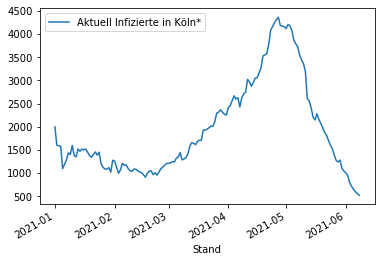

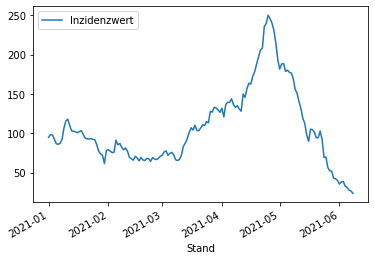

In [28]:
dff.plot(y='Bestätigte Kölner Fälle')
dff.plot(y=dff.columns[2])
dff.plot(y=dff.columns[0])

The number of hospitalized individuals and deseased ones can be appreciated as well

In [29]:
dff.columns.name = 'Legend'

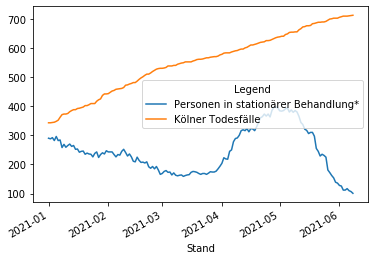

In [30]:
dff.plot(y=[dff.columns[3],dff.columns[-1]])

As complementary information we can extract the dayly confirmed cases also

In [34]:
df_new = dff['Bestätigte Kölner Fälle'].diff().dropna().to_frame()
df_new.tail()

,Bestätigte Kölner Fälle
Stand,
2021-06-04,26.0
2021-06-05,35.0
2021-06-06,35.0
2021-06-07,20.0
2021-06-08,14.0


In [365]:
#new.columns = ['date','New infections']

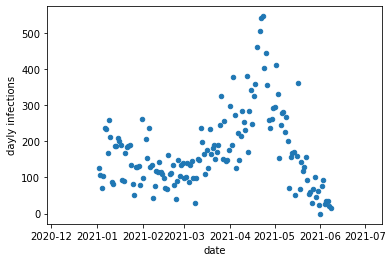

In [35]:
df_new.reset_index(inplace=True)
df_new.columns = ['date','dayly infections']
df_new.plot.scatter(x='date', y='dayly infections')

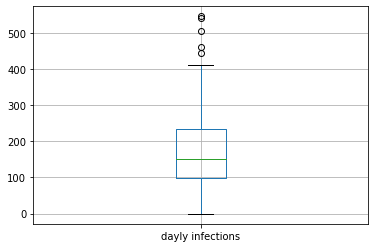

In [36]:
df_new.boxplot()

In [530]:
# number of new infections:
I = df_new[df_new['dayly infections']<400]

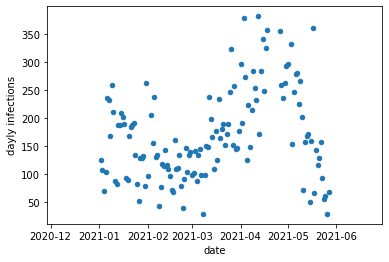

In [531]:
I.plot.scatter(x='date', y='dayly infections')

In [37]:
#N = I['dayly infections'].values
Nc = df_new['dayly infections'].values

In [38]:
#x = np.arange(len(N))
xc = np.arange(len(Nc))

In [39]:
from scipy.optimize import curve_fit

def exponential(x, a, b):
    return a*np.exp(b*x)

def power(x, a, b, c):
    return a*(b**(c*x))

def expo(x,a,b,c):
    return a*np.exp(b*x)+c

def powo(x,a,b,c,d):
    return a*(b**(c*x))+d

In [40]:
pars, cov = curve_fit(f=expo, xdata=xc[110:], ydata=Nc[110:], p0=[10, -.1, .2])

C:\Users\sebas\anaconda3\envs\intel\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


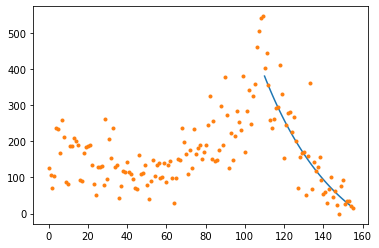

In [41]:
plt.plot(xc[110:], expo(xc[110:], *pars))
plt.plot(xc, Nc,'.')

In [42]:
a, b, c = pars

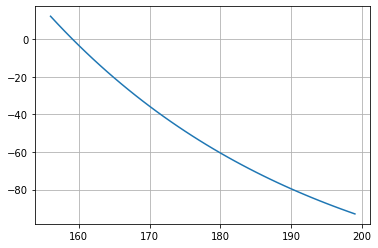

In [43]:
Xc = np.arange(len(xc),200)
curve = expo(Xc,a,b,c)
plt.plot(Xc,curve)
plt.grid()
plt.show()

Let's do some machine learning

## Machine Learning Models of Linear Regression

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [55]:
X = xc.reshape(1,-1).astype('float')
y = Nc.reshape(1,-1).astype('float')

In [56]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [57]:
y_pred = lr.predict(X)

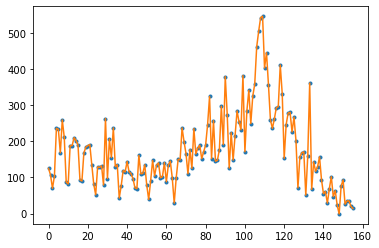

In [58]:
plt.plot(X.flatten(),y.flatten(),'.')
plt.plot(X.flatten(),y_pred.flatten())
plt.show()

We can see from the graphic that not only the model is inapropriate but it leads to overfitting. To overcome that we must resort to polynomial regression. Notice that there is no reason to prefer a polyonmial degree over the other since ultimately it is the SIR model that dictates how the proper parameters behave according to the theory. This might only be taken as a proxy for forecasting:

C:\Users\sebas\anaconda3\envs\intel\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.62312e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\sebas\anaconda3\envs\intel\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.2225e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\sebas\anaconda3\envs\intel\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.64968e-28): result may not be accurate.
  overwrite_a=True).T


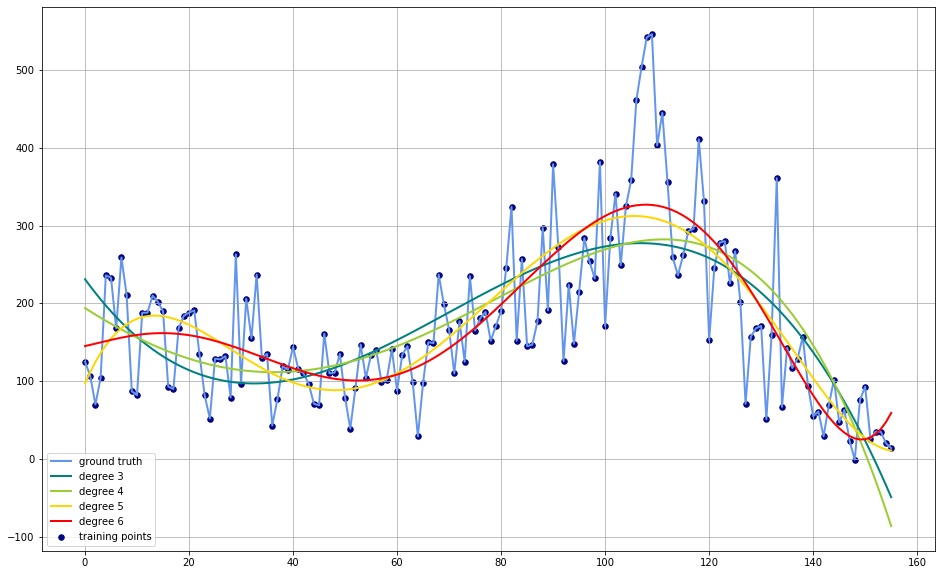

In [65]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# generate points used to plot
x_plot = xc
# create matrix versions of these arrays
X = xc[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]
y = Nc[:,np.newaxis]

colors = ['teal', 'yellowgreen', 'gold', 'red']
lw = 2

plt.figure(figsize=(16,10))
plt.plot(x_plot, y, color='cornflowerblue', linewidth=lw, label="ground truth")
plt.scatter(xc, y, color='navy', s=30, marker='o', label="training points")


for count, degree in enumerate([3, 4, 5, 6]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')
plt.grid()
plt.show()

In [66]:
x_preds = np.arange(len(Nc),len(Nc)+20) #let's say 20 days
X_preds = x_preds[:, np.newaxis]
y_preds = model.predict(X_preds)

In [67]:
print(y_preds.flatten())

[  73.82554603   91.59186122  112.72631339  137.47661924  166.10078294
  198.8673383   236.05559352  277.95587844  324.86979435  377.11046642
  435.00279862  498.88373119  569.10250077  646.02090296  730.0135575
  821.468176    920.78583224 1028.38123499 1144.68300343 1270.13394507]


## Time Series Forecasting with TensorFlow:

Well, the resulting values don't really make sense given that the number of infections should be always positive. But of course we already knew that, the epidemic and postepidemic phases are always exponential.
For the sake of completeness, let us try a very basic forecasting model with neural networks:

In [68]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [69]:
def arrange_data(data, days):
    days_before_values = []
    days_values = []
    
    for i in range(len(data)- days):
        days_before_values.append(data[i:(i+days)])
        days_values.append(data[i+days])
    
    return np.array(days_before_values), np.array(days_values)

In [70]:
#moving average of three days for the number of infected individuals:
NSMA=dff.Inzidenzwert.values.reshape(-1,1)
SMA=dff[dff.columns[0]].rolling(7, min_periods=1).mean()

In [71]:
normal_data = dff.Inzidenzwert.values.reshape(-1,1)
mc = MinMaxScaler(feature_range=(0,1))
final_normal_data = mc.fit_transform(normal_data)

In [72]:
initial_data = SMA.values.reshape(-1,1)
sc = MinMaxScaler(feature_range=(0,1))
final_data = sc.fit_transform(initial_data)

In [73]:
DAYS_BEFORE = 7
days_before_values, days_values = arrange_data(final_data, DAYS_BEFORE)
days_before_values = days_before_values.reshape((days_before_values.shape[0], DAYS_BEFORE, 1))

Xs = days_before_values
ys = days_values

In [74]:
_,Ys = arrange_data(final_normal_data, DAYS_BEFORE)

In [75]:
model = Sequential()
model.add(LSTM(30, input_shape=(DAYS_BEFORE,1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae']) #SGD

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30)                3840      
_________________________________________________________________
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________


In [76]:
ES = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=5)
history = model.fit(Xs, ys, epochs = 500, batch_size=64,callbacks=[ES])

Train on 150 samples
Epoch 1/500
150/150 [==============================] - 8s 56ms/sample - loss: 0.2901 - mae: 0.4597
Epoch 2/500
150/150 [==============================] - 0s 361us/sample - loss: 0.2303 - mae: 0.4033
Epoch 3/500
150/150 [==============================] - 0s 567us/sample - loss: 0.1843 - mae: 0.3564
Epoch 4/500
150/150 [==============================] - 0s 349us/sample - loss: 0.1535 - mae: 0.3246
Epoch 5/500
150/150 [==============================] - 0s 378us/sample - loss: 0.1332 - mae: 0.3000
Epoch 6/500
150/150 [==============================] - 0s 267us/sample - loss: 0.1151 - mae: 0.2750
Epoch 7/500
150/150 [==============================] - 0s 308us/sample - loss: 0.0976 - mae: 0.2489
Epoch 8/500
150/150 [==============================] - 0s 306us/sample - loss: 0.0814 - mae: 0.2210
Epoch 9/500
150/150 [==============================] - 0s 266us/sample - loss: 0.0652 - mae: 0.1913
Epoch 10/500
150/150 [==============================] - 0s 293us/sample - loss: 

150/150 [==============================] - 0s 311us/sample - loss: 0.0027 - mae: 0.0398
Epoch 82/500
150/150 [==============================] - 0s 331us/sample - loss: 0.0026 - mae: 0.0392
Epoch 83/500
150/150 [==============================] - 0s 294us/sample - loss: 0.0026 - mae: 0.0388
Epoch 84/500
150/150 [==============================] - 0s 389us/sample - loss: 0.0025 - mae: 0.0381
Epoch 85/500
150/150 [==============================] - 0s 284us/sample - loss: 0.0026 - mae: 0.0386
Epoch 86/500
150/150 [==============================] - 0s 349us/sample - loss: 0.0024 - mae: 0.0370
Epoch 87/500
150/150 [==============================] - 0s 340us/sample - loss: 0.0023 - mae: 0.0360
Epoch 88/500
150/150 [==============================] - 0s 360us/sample - loss: 0.0022 - mae: 0.0354
Epoch 89/500
150/150 [==============================] - 0s 312us/sample - loss: 0.0022 - mae: 0.0358
Epoch 90/500
150/150 [==============================] - 0s 411us/sample - loss: 0.0021 - mae: 0.0345
Epo

In [77]:
X_test = Xs[-1]
X_test = np.expand_dims(X_test, axis=0)

In [78]:
Xs_pred = final_data[-DAYS_BEFORE:]
Xs_pred = np.expand_dims(Xs_pred, axis=0)

In [79]:
prediction = sc.inverse_transform(model.predict(X_test)).flatten()[0]
ys_pred = sc.inverse_transform(model.predict(Xs_pred)).flatten()[0]
predictions_on_training = sc.inverse_transform(model.predict(Xs))

In [80]:
print('predicted value: ', np.round(prediction,2))
print('actual value: ', SMA[-1])
print('prediction for tomorrow: ', np.round(ys_pred,2))

predicted value:  28.7
actual value:  31.25714285714272
prediction for tomorrow:  26.72


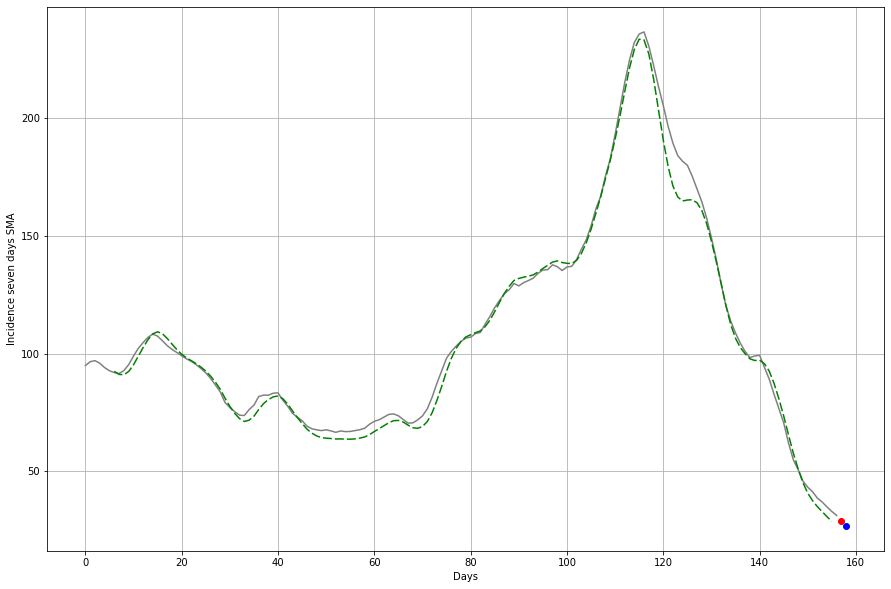

In [82]:
plt.figure(figsize = (15,10))
plt.plot(len(initial_data),prediction, 'o', color='red')
plt.plot(len(initial_data)+1,ys_pred, 'o', color='blue')
plt.plot(initial_data, color = 'gray')
plt.plot(DAYS_BEFORE-1+np.arange(len(predictions_on_training)), predictions_on_training, color = 'green', dashes = [6,2])
plt.xlabel('Days')
plt.ylabel('Incidence seven days SMA')
plt.grid()
plt.show()

We've got actually nice results!
The basic RNN is able to force predictions based on a three day seasonal window. Whether that can be extended for longer periods of time depends crucially upon many factors since we are not talking about the weather but a virus!

Having explored the less regular options now we can move to actual biology: the SIR-D model.

## Modelling the Coronavirus Spread with the SIRD Model

In [83]:
dff.tail()

Legend,Inzidenzwert,Bestätigte Kölner Fälle,Aktuell Infizierte in Köln*,Personen in stationärer Behandlung*,Kölner Todesfälle
Stand,,,,,
2021-06-04,32.8,52961.0,718.0,112,709
2021-06-05,31.1,52996.0,650.0,117,709
2021-06-06,27.6,53031.0,598.0,110,710
2021-06-07,26.7,53051.0,561.0,107,711
2021-06-08,23.7,53065.0,522.0,101,712


In [84]:
N = 1e6
It=dff[dff.columns[2]]/N
#Rt=dff[dff.columns[4]]/N
Rt=(dff[dff.columns[1]]-dff[dff.columns[4]])/N
Dt=dff[dff.columns[4]]/N
St=1-It-Rt-Dt

In [85]:
Cases=dff[dff.columns[1]]/N

In [86]:
S0=1-It[0]-Rt[0]-Dt[0]

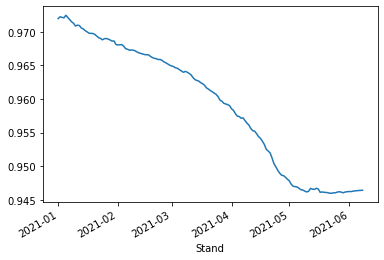

In [87]:
St.plot()

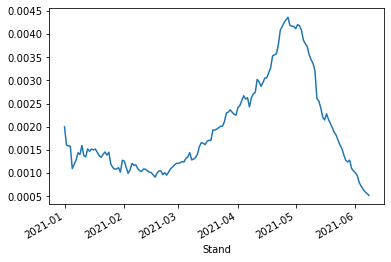

In [88]:
It.plot()

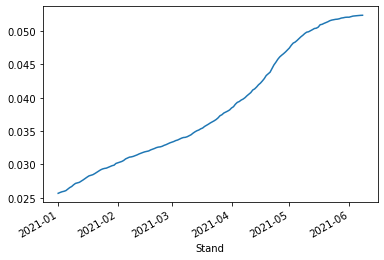

In [89]:
Rt.plot()

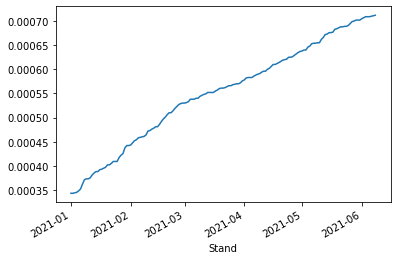

In [90]:
Dt.plot()

In [91]:
it = It.copy().values
#itm = np.sort(it) #second smallest value

In [92]:
idxb=list(np.where(it==it.max()))[0][0]
#idxa=list(np.where(it==it.min()))[0]
#idxb=list(np.where(it==it.max()))[0]

In [93]:
idxa=list(np.where(it==it[:idxb].min()))[0][0]

In [94]:
ST=St[idxa:]
IT=It[idxa:]
RT=Rt[idxa:]
DT=Dt[idxa:]
CT=Cases[idxa:]

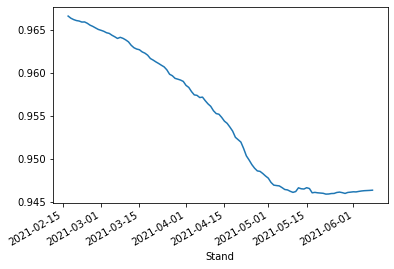

In [95]:
ST.plot()

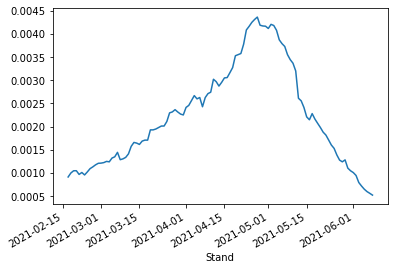

In [96]:
IT.plot()

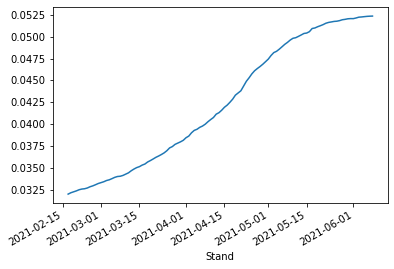

In [97]:
RT.plot()

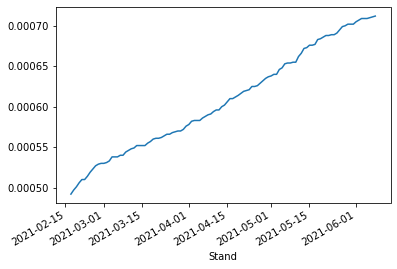

In [98]:
DT.plot()

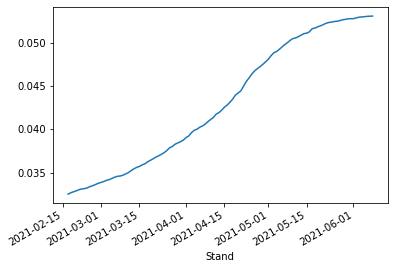

In [99]:
CT.plot()

In [100]:
XI =It[idxa:idxb-10].values
XD = Dt[idxa:idxb-10].values
XR = Rt[idxa:idxb-10].values

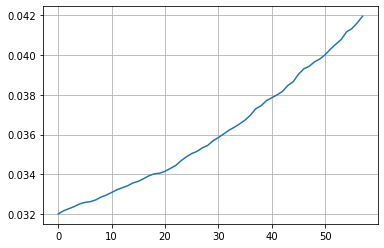

In [101]:
#plt.plot(np.arange(len(XI)),XI)
plt.plot(np.arange(len(XR)),XR)
plt.grid()
plt.show()

In [102]:
pars, cov = curve_fit(f=exponential, xdata=np.arange(len(XI)), ydata=XI, p0=[XI[0], .1])
pars2, cov2 = curve_fit(f=power, xdata=np.arange(len(XI)), ydata=XI, p0=[XI[0], 1, .1])
pars3, cov3 = curve_fit(f=expo, xdata=np.arange(len(XR)), ydata=XR, p0=[XR[0], .1, .03])

In [104]:
a1, b1 = pars
a2,b2,c2 = pars2
a3,b3,c3 = pars3

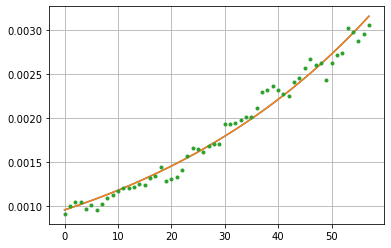

In [105]:
plt.plot(np.arange(len(XI)),exponential(np.arange(len(XI)),*pars))
plt.plot(np.arange(len(XI)),power(np.arange(len(XI)),*pars2))
plt.plot(np.arange(len(XI)),XI,'.')
plt.grid()
plt.show()

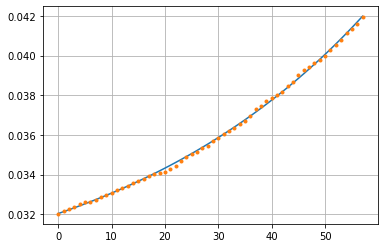

In [106]:
plt.plot(np.arange(len(XR)),expo(np.arange(len(XR)),*pars3))
plt.plot(np.arange(len(XR)),XR,'.')
plt.grid()
plt.show()

In [122]:
R0=np.exp(b/c2) #basic reproduction number

In [264]:
#alpha = 1/11
#mu = (DT[0]/CT[0])
#beta = R0*alpha

In [107]:
d = 69
mu = b1*((DT[d]-DT[0])/(IT[d]-IT[0])) #death rate
alpha = b1*((RT[d]-RT[0])/(IT[d]-IT[0])) #recovery rate
beta =(b1+alpha+mu)/ST[0] #rate of infection
R_0=beta/alpha #basic reproduction number according to SIR 

In [108]:
R_0

1.2768466968987287

Having already estimated the relevant parameters, we can now turn to the SIR model

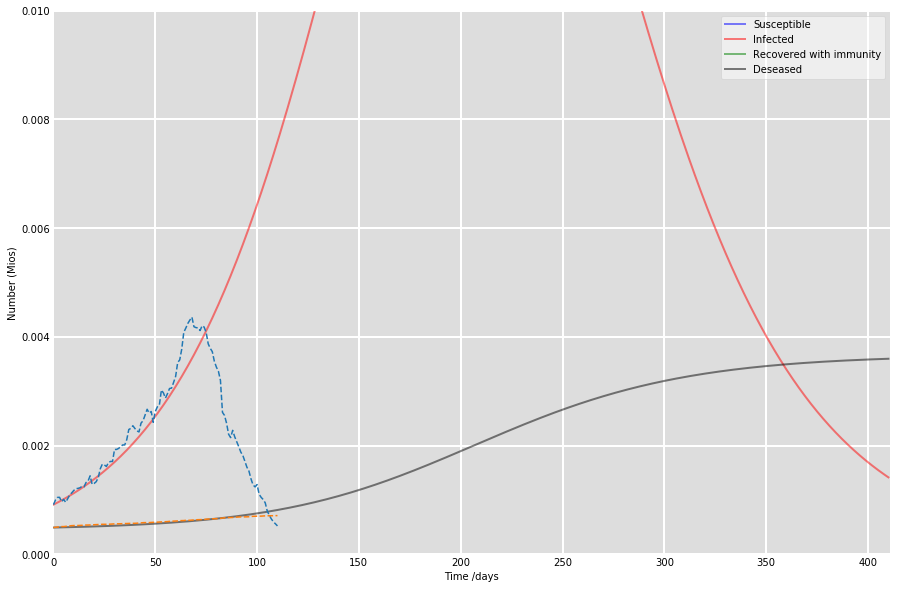

In [109]:
from scipy.integrate import odeint
# Initial number of infected and recovered individuals, I0 and R0. 
#Contact rate, beta, and mean recovery rate, gamma, (in 1/days).

IT0, RT0, ST0, DT0 = IT[0], RT[0], ST[0], DT[0]
# A grid of time points (in days)
t = np.arange(len(IT)+300)

# The SIR model differential equations.
def deriv(y, t, beta, alpha, mu):
    S, I, R, D = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I - alpha * I - mu * I
    dRdt = alpha * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

# Initial conditions vector
y0 = ST0, IT0, RT0, DT0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(beta, alpha, mu))
S, I, R, D = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize=(15,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D, 'black', alpha=0.5, lw=2, label='Deseased')
ax.plot(np.arange(len(IT)),IT.values,'--')
ax.plot(np.arange(len(DT)),DT.values,'--')
ax.plot(np.arange(len(RT)),RT.values,'--')
ax.plot(np.arange(len(ST)),ST.values,'--')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (Mios)')
ax.set_xlim(0,len(t))
ax.set_ylim(0,1/100)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [1321]:
#side remarks:
# the initial number of removed individuals is equal to the number of confirmed cases minus the deseased ones.

In [110]:
df[df[df.columns[3]]==df[df.columns[3]].max()]

,Stand,Inzidenzwert,Bestätigte Kölner Fälle,Aktuell Infizierte in Köln*,Personen in stationärer Behandlung*,Kölner Todesfälle
117,2021-04-27,240.0,46991.0,4362.0,386,629


Now at last we can have a look a the actual development of the epidemic. An exponential fit would be enough to show the relevant values such as the R-value:

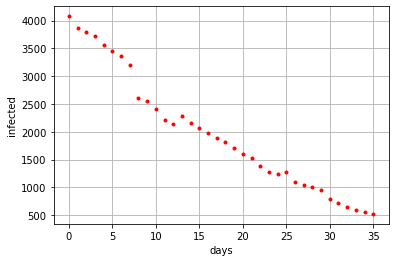

In [111]:
X_decay = It[idxb+7:].values*N
plt.plot(np.arange(len(X_decay)),X_decay,'.',color='r')
plt.xlabel('days')
plt.ylabel('infected')
plt.grid()
plt.show()

In [112]:
parameters, covariance = curve_fit(f=exponential, xdata=np.arange(len(X_decay)), ydata=X_decay, p0=[X_decay[0], -.1])
parameters_, covariance_ = curve_fit(f=powo, xdata=np.arange(len(X_decay)), ydata=X_decay, p0=[X_decay[0], 0.66, 0.1, 0])

C:\Users\sebas\anaconda3\envs\intel\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in power
  del sys.path[0]


In [113]:
A, K = parameters
B, R, F, C = parameters_

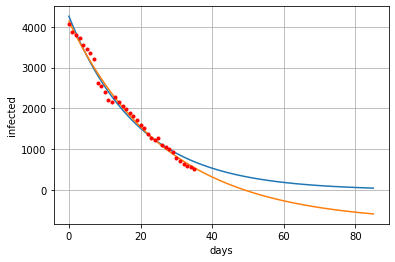

In [114]:
plt.plot(np.arange(len(X_decay)+50),exponential(np.arange(len(X_decay)+50),*parameters))
plt.plot(np.arange(len(X_decay)+50),powo(np.arange(len(X_decay)+50),*parameters_))
plt.plot(np.arange(len(X_decay)),X_decay,'.',color='r')
plt.xlabel('days')
plt.ylabel('infected')
plt.grid()
plt.show()

In [90]:
# R-value:
R0=np.exp(K/F)

In [115]:
# Serial number T_G:
T_G = 1/F

In [116]:
# (doubling time) Verdopplungszeit
td = -np.log(2)/K

In [123]:
exponential(len(X_decay),*parameters)

664.1569410775222

In [118]:
T_G

9.901044776252556

In [119]:
R

0.6920241618886032